<a href="https://colab.research.google.com/github/Fadhleerasdi/FlyGuard/blob/main/GROUPPROJECT_DATA_ENGINEERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**DATA SCRAPING**

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from tabulate import tabulate

# Base URL and headers
base_url = "https://www.goodreads.com/list/show/43.Best_Young_Adult_Books?page="
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

In [ ]:
# Initialize lists to store data
title_list, author_list, score_list, rating_list, votes_list, book_genre_list, book_date_list, book_review_list = [], [], [], [], [], [], [], []
book_url_list = []

In [ ]:
# Function to extract genres
def extract_genre(url):
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup_book = BeautifulSoup(response.content, 'html.parser')
        genre_element = soup_book.find("span", {"class": "BookPageMetadataSection__genreButton"})
        if genre_element:
            return genre_element.get_text(strip=True)
    return None

In [ ]:
# Function to extract publication date
def extract_date_published(url):
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup_book = BeautifulSoup(response.content, 'html.parser')
        date_published_element = soup_book.find("p", {"data-testid": "publicationInfo"})
        if date_published_element:
            return date_published_element.get_text(strip=True)
    return None

In [ ]:
# Function to extract number of reviews
def extract_review(url):
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup_book = BeautifulSoup(response.content, 'html.parser')
        review_element = soup_book.find("span", {"data-testid": "reviewsCount"})
        if review_element:
            return review_element.get_text(strip=True)
    return None

In [ ]:
# Loop through pages 1 and 2
for page in range(1, 3):  # Adjust range if more pages are needed
    url = base_url + str(page)
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Book URLs
        books = soup.find_all("div", {"class": "js-tooltipTrigger tooltipTrigger"})
        for book in books:
            link = book.find("a").get('href')
            book_url = "https://www.goodreads.com" + link
            book_url_list.append({'URL': book_url})

        # Titles
        titles = soup.find_all("a", {"class": "bookTitle"})
        for title in titles:
            title_list.append(title.get_text(strip=True))

        # Authors
        authors = soup.find_all("a", {"class": "authorName"})
        for author in authors:
            author_list.append(author.get_text(strip=True))

        # Scores
        scores = soup.find_all(string=lambda string: string and 'score:' in string.lower())
        for score in scores:
            score_list.append(score.replace("score: ", "").strip())

        # Ratings
        ratings = soup.find_all('span', {'class': 'minirating'})
        for rating in ratings:
            rating_list.append(rating.get_text(strip=True))

        # Votes
        voting_links = soup.find_all('a', {'id': lambda x: x and x.startswith('loading_link')})
        for link in voting_links:
            votes_list.append(link.get_text(strip=True).replace(" people voted", "").strip())

In [ ]:
# Extract genres, published dates, and reviews for all books
for book_url in book_url_list:
    url = book_url['URL']
    book_genre_list.append(extract_genre(url))
    book_date_list.append(extract_date_published(url))
    book_review_list.append(extract_review(url))

In [ ]:
# Create DataFrames for each attribute
df_title = pd.DataFrame({'Title': title_list})
df_author = pd.DataFrame({'Author': author_list})
df_score = pd.DataFrame({'Score': score_list})
df_rating = pd.DataFrame({'Ratings': rating_list})
df_votes = pd.DataFrame({'Number of People Voted': votes_list})
df_genre = pd.DataFrame({'Genre': book_genre_list})
df_date = pd.DataFrame({'Date Published': book_date_list})
df_reviews = pd.DataFrame({'Number of Reviews': book_review_list})


In [ ]:
# Combine all DataFrames
df_combined = pd.concat([df_title, df_author, df_score, df_rating, df_votes, df_genre, df_date, df_reviews], axis=1)
# Print the combined DataFrame using tabulate
print(tabulate(df_combined, headers='keys', tablefmt='pipe'))

|     | Title                                                                                | Author                   | Score     | Ratings                                            | Number of People Voted   | Genre              | Date Published                     | Number of Reviews   |
|----:|:-------------------------------------------------------------------------------------|:-------------------------|:----------|:---------------------------------------------------|:-------------------------|:-------------------|:-----------------------------------|:--------------------|
|   0 | Harry Potter and the Sorcerer’s Stone (Harry Potter, #1)                             | J.K. Rowling             | 1,611,281 | 4.47 avg rating — 10,714,400 ratings               | 14,722                   | Fantasy            | First published June 26, 1997      | 176,666reviews      |
|   1 | The Lightning Thief (Percy Jackson and the Olympians, #1)                            | Rick Riordan           

In [ ]:
# Save the DataFrame to a CSV file
df_combined.to_csv('raw_data.csv', index=False)
print("Data successfully saved to 'cleaned_data.csv'")

Data successfully saved to 'cleaned_data.csv'


In [ ]:
filename1 = '/content/raw_data.csv'
data1 = pd.read_csv(filename1)

print(data1)

                                                                             Title  \
0                         Harry Potter and the Sorcerer’s Stone (Harry Potter, #1)   
1                        The Lightning Thief (Percy Jackson and the Olympians, #1)   
2                                          The Hunger Games (The Hunger Games, #1)   
3                                                 Twilight (The Twilight Saga, #1)   
4                         Harry Potter and the Sorcerer's Stone (Harry Potter, #1)   
..                                                                             ...   
195                                                            Heidi (Heidi, #1-2)   
196  Angus, Thongs and Full-Frontal Snogging (Confessions of Georgia Nicolson, #1)   
197                                                  Stormbreaker (Alex Rider, #1)   
198                                                     It's Kind of a Funny Story   
199                                                   

In [ ]:
# Check for missing values in the DataFrame
missing_values = df_combined.isnull().sum()

# Print the total missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

# Check if there are any missing values overall
if missing_values.sum() > 0:
    print("\nThere are missing values in the dataset.")
else:
    print("\nThere are no missing values in the dataset.")


Missing Values in Each Column:
Title                     0
Author                    0
Score                     0
Ratings                   0
Number of People Voted    0
Genre                     3
Date Published            1
Number of Reviews         0
dtype: int64

There are missing values in the dataset.


##**PREPROCESSING**

1. standardize the Date Published

In [ ]:
# Reloading necessary libraries after reset
import pandas as pd

# Reload the dataset
file_path = '/content/raw_data.csv'
df_date = pd.read_csv(file_path)

# Remove the words "First published" from the 'Date Published' column
df_date['Date Published'] = df_date['Date Published'].str.replace('First published', '', regex=True).str.strip()

# Display the updated column to the user using pandas' display function
# Instead of ace_tools, use the standard pandas display function which is readily available
display(df_date[['Date Published']])

,Date Published
0,"June 26, 1997"
1,"July 28, 2005"
2,"September 14, 2008"
3,"October 5, 2005"
4,"June 26, 1997"
...,...
195,"January 1, 1880"
196,"June 24, 1999"
197,"September 4, 2000"
198,"March 21, 2006"


In [ ]:
# Reset the 'Date Published' column to its original values from the raw dataset
file_path = '/content/raw_data.csv'
df_raw = pd.read_csv(file_path)

# Restore 'Date Published' in df_combined from the raw dataset
df_combined['Date Published'] = df_raw['Date Published']

# Instead of using ace_tools, use the display function from IPython.display
from IPython.display import display
display(df_combined[['Title', 'Date Published']])


,Title,Date Published
0,"Harry Potter and the Sorcerer’s Stone (Harry Potter, #1)","First published June 26, 1997"
1,"The Lightning Thief (Percy Jackson and the Olympians, #1)","First published July 28, 2005"
2,"The Hunger Games (The Hunger Games, #1)","First published September 14, 2008"
3,"Twilight (The Twilight Saga, #1)","First published October 5, 2005"
4,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","First published June 26, 1997"
...,...,...
195,"Heidi (Heidi, #1-2)","First published January 1, 1880"
196,"Angus, Thongs and Full-Frontal Snogging (Confessions of Georgia Nicolson, #1)","First published June 24, 1999"
197,"Stormbreaker (Alex Rider, #1)","First published September 4, 2000"
198,It's Kind of a Funny Story,"First published March 21, 2006"


In [ ]:
# Step 1: Inspect the raw values
print("\nRaw 'Date Published' values before cleaning:")
print(df_combined['Date Published'].head(20))

# Step 2: Clean the 'Date Published' column
df_combined['Date Published'] = df_combined['Date Published'].str.replace('First published', '', regex=True).str.strip()

# Step 3: Test parsing without replacing invalid values
test_dates = pd.to_datetime(df_combined['Date Published'], errors='coerce')

# Step 4: Print rows with invalid dates for debugging
invalid_dates = df_combined[test_dates.isna()]
print("\nRows with invalid 'Date Published':")
print(invalid_dates[['Title', 'Date Published']])

# Step 5: Convert 'Date Published' to datetime
df_combined['Date Published'] = pd.to_datetime(
    df_combined['Date Published'], errors='coerce'
)

# Step 6: Fill missing/invalid dates with a placeholder
df_combined['Date Published'].fillna(pd.Timestamp('1900-01-01'), inplace=True)

# Step 7: Format to 'YYYY-MM-DD'
df_combined['Date Published'] = df_combined['Date Published'].dt.strftime('%Y-%m-%d')

# Step 8: Verify the cleaned data
print("\nCleaned 'Date Published' Column:")
print(df_combined[['Title', 'Date Published']].head(20))



Raw 'Date Published' values before cleaning:
0     1997-06-26
1     2005-07-28
2     2008-09-14
3     2005-10-05
4     1997-06-26
5     1993-04-26
6     2012-01-10
7     2007-03-27
8     2011-04-25
9     2005-09-01
10    1960-07-11
11    1999-02-01
12    1937-09-21
13    1998-08-20
14    1967-04-24
15    1995-07-01
16    2008-05-06
17    2005-03-03
18    2007-08-16
19    2002-06-01
Name: Date Published, dtype: object

Rows with invalid 'Date Published':
Empty DataFrame
Columns: [Title, Date Published]
Index: []

Cleaned 'Date Published' Column:
                                                              Title  \
0          Harry Potter and the Sorcerer’s Stone (Harry Potter, #1)   
1         The Lightning Thief (Percy Jackson and the Olympians, #1)   
2                           The Hunger Games (The Hunger Games, #1)   
3                                  Twilight (The Twilight Saga, #1)   
4          Harry Potter and the Sorcerer's Stone (Harry Potter, #1)   
5                     

<ipython-input-134-9e67d8c0295e>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined['Date Published'].fillna(pd.Timestamp('1900-01-01'), inplace=True)


2. Ascending "Title"

In [ ]:
# Sort the combined DataFrame by the 'Title' column in ascending order
df_combined_sorted = df_combined.sort_values(by='Title', ascending=True).reset_index(drop=True)

# Display the sorted DataFrame
print("\nCombined Data Sorted by 'Title':")
print(tabulate(df_combined_sorted, headers='keys', tablefmt='pipe'))

# Save the sorted DataFrame to a new CSV file
df_combined_sorted.to_csv('sorted_combined_data.csv', index=False)
print("\nSorted combined data saved to 'sorted_combined_data.csv'")



Combined Data Sorted by 'Title':
|     | Title                                                                                | Author                   | Score     | Ratings                                            | Number of People Voted   | Genre              | Date Published   | Number of Reviews   |
|----:|:-------------------------------------------------------------------------------------|:-------------------------|:----------|:---------------------------------------------------|:-------------------------|:-------------------|:-----------------|:--------------------|
|   0 | A Child Called "It" (Dave Pelzer, #1)                                                | Dave Pelzer              | 34,178    | 4.13 avg rating — 448,039 ratings                  | 409                      | Nonfiction         | 1995-01-01       | 19,297reviews       |
|   1 | A Great and Terrible Beauty (Gemma Doyle, #1)                                        | Libba Bray               | 129,500   | 3.80

3. Extract Numeric Data from Ratings

In [ ]:
import pandas as pd
from tabulate import tabulate

# Load the dataset
file_path = 'sorted_combined_data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Extract numeric data from 'Ratings'
df['Avg Ratings'] = df['Ratings'].str.extract(r'(\d+\.\d+)').astype(float)  # Extract average rating as float
df['Total Ratings'] = df['Ratings'].str.extract(r'— ([\d,]+)').replace(',', '', regex=True).astype(int)  # Extract total ratings as integer

# Save the updated DataFrame to a new CSV file
output_file = 'extracted_ratings_data.csv'
df.to_csv(output_file, index=False)

# Display the updated DataFrame
print("\nData with Extracted Ratings:")
print(tabulate(df[['Title', 'Author', 'Avg Ratings', 'Total Ratings', 'Score',
                   'Number of People Voted', 'Genre', 'Date Published', 'Number of Reviews']],
               headers='keys', tablefmt='pipe'))

print(f"\nThe updated data with extracted ratings has been saved to '{output_file}'.")



Data with Extracted Ratings:
|     | Title                                                                                | Author                   |   Avg Ratings |   Total Ratings | Score     | Number of People Voted   | Genre              | Date Published   | Number of Reviews   |
|----:|:-------------------------------------------------------------------------------------|:-------------------------|--------------:|----------------:|:----------|:-------------------------|:-------------------|:-----------------|:--------------------|
|   0 | A Child Called "It" (Dave Pelzer, #1)                                                | Dave Pelzer              |          4.13 |          448039 | 34,178    | 409                      | Nonfiction         | 1995-01-01       | 19,297reviews       |
|   1 | A Great and Terrible Beauty (Gemma Doyle, #1)                                        | Libba Bray               |          3.8  |          224450 | 129,500   | 1,434                    | Fant

In [ ]:
import pandas as pd

# Load the uploaded CSV file
file_path = '/content/extracted_ratings_data.csv'
df = pd.read_csv(file_path)

# Select only the columns as shown in the provided images
columns_to_keep = ['Title', 'Author', 'Avg Ratings', 'Total Ratings', 'Score',
                   'Number of People Voted', 'Genre', 'Date Published', 'Number of Reviews']

df_new_combined = df[columns_to_keep]

# Save the new DataFrame to a CSV file
output_file = '/content/df_new_combined.csv'
df_new_combined.to_csv(output_file, index=False)

# Display the path of the saved file for confirmation
output_file


'/content/df_new_combined.csv'

4. Remove "review" in attribute Number of Review

In [ ]:
import pandas as pd

# Load the new dataset (from previous cleaned CSV)
file_path = '/content/df_new_combined.csv'  # Replace with the new cleaned file path
df = pd.read_csv(file_path)

# Step 1: Inspect raw values in 'Number of Reviews'
print("\nRaw 'Number of Reviews' values before cleaning:")
print(df['Number of Reviews'].head(10))

# Step 2: Extract numeric data from 'Number of Reviews'
df['Number of Reviews'] = df['Number of Reviews'].str.extract(r'(\d[\d,]*)')[0]  # Extract only numeric data
df['Number of Reviews'] = df['Number of Reviews'].str.replace(',', '').astype(int)  # Remove commas and convert to integer

# Step 3: Verify the cleaned data
print("\nCleaned 'Number of Reviews' Column:")
print(df[['Title', 'Number of Reviews']].head(10))

# Step 4: Save the preprocessed dataset
df_cleaned_data = df.copy()  # Save the cleaned dataset into df_cleaned_data
output_file = '/content/df_cleaned_data.csv'
df_cleaned_data.to_csv(output_file, index=False)

# Display the path of the saved file for confirmation
output_file



Raw 'Number of Reviews' values before cleaning:
0    19,297reviews
1    10,662reviews
2    10,603reviews
3    10,163reviews
4    29,386reviews
5    41,043reviews
6     6,382reviews
7     5,643reviews
8     8,896reviews
9     7,235reviews
Name: Number of Reviews, dtype: object

Cleaned 'Number of Reviews' Column:
                                                   Title  Number of Reviews
0                  A Child Called "It" (Dave Pelzer, #1)              19297
1          A Great and Terrible Beauty (Gemma Doyle, #1)              10662
2                                      A Little Princess              10603
3                                       A Separate Peace              10163
4                               A Tree Grows in Brooklyn              29386
5                   A Wrinkle in Time (Time Quintet, #1)              41043
6  Alanna: The First Adventure (Song of the Lioness, #1)               6382
7                                    Alice in Wonderland               5643
8

'/content/df_cleaned_data.csv'

##**DATA VISUALISATION**

1. Raw Data

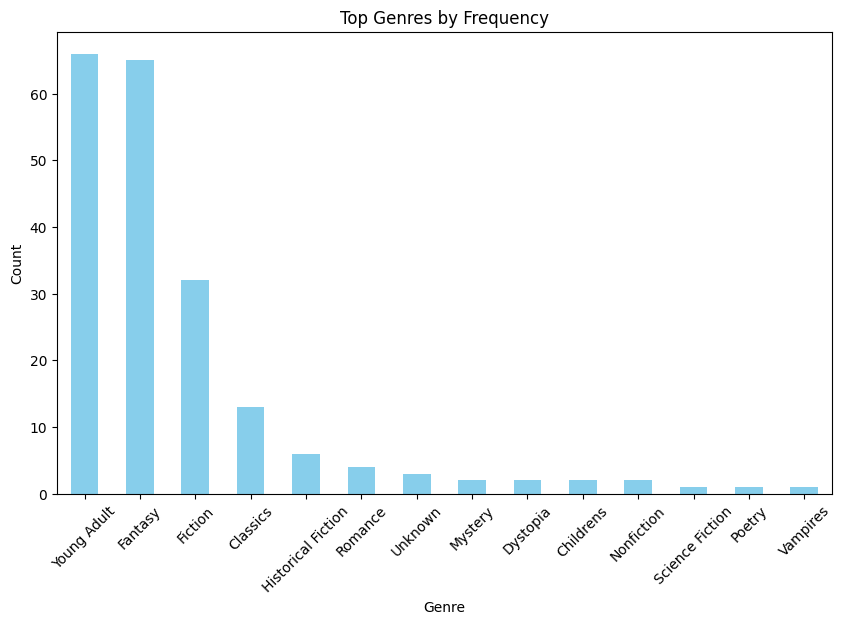

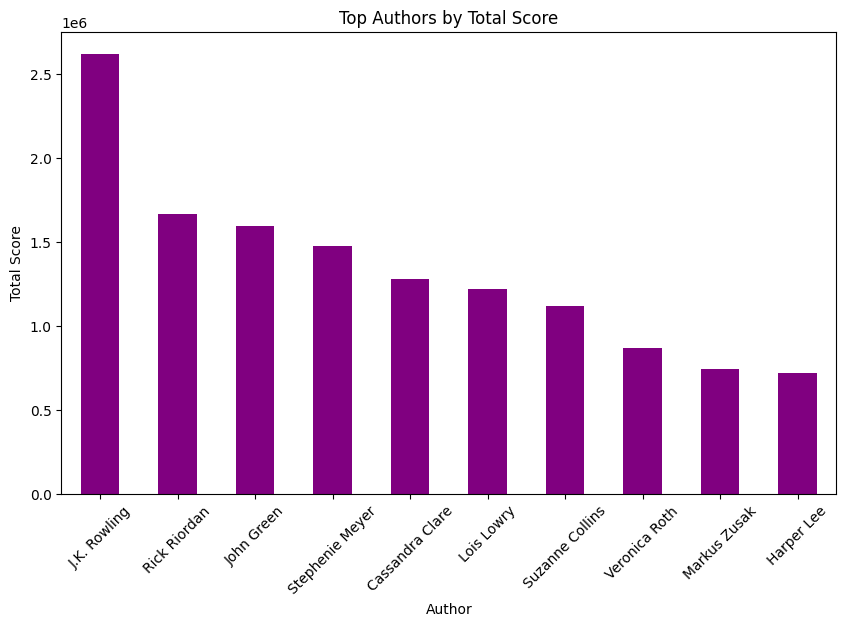

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/raw_data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Preprocess the data for visualizations

# Extract average rating from 'Ratings'
df['Avg Rating'] = df['Ratings'].str.extract(r'(\d+\.\d+)').astype(float)

# Extract year of publication from 'Date Published'
df['Year Published'] = pd.to_datetime(df['Date Published'].str.replace('First published', '', regex=True).str.strip(), errors='coerce').dt.year

# Handle missing or malformed data
df['Genre'] = df['Genre'].fillna('Unknown')

# Visualization 1: Top Genres by Frequency
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top Genres by Frequency')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Visualization 2: Top Authors by Total Score
df['Score'] = df['Score'].str.replace(',', '').astype(int)
top_authors = df.groupby('Author')['Score'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='purple')
plt.title('Top Authors by Total Score')
plt.xlabel('Author')
plt.ylabel('Total Score')
plt.xticks(rotation=45)
plt.show()


2. Cleaned data

<Figure size 1400x800 with 0 Axes>

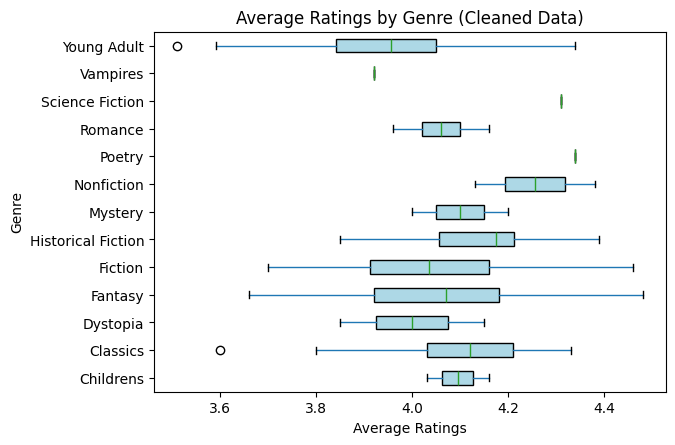

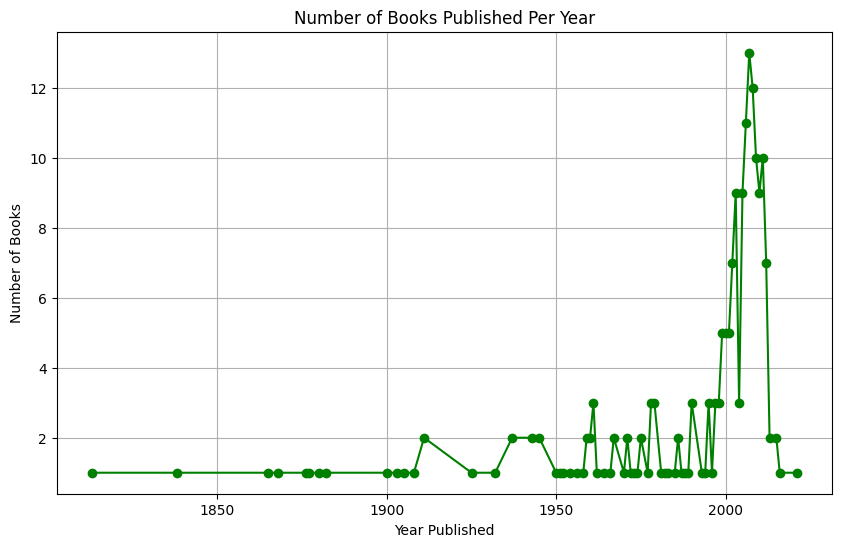

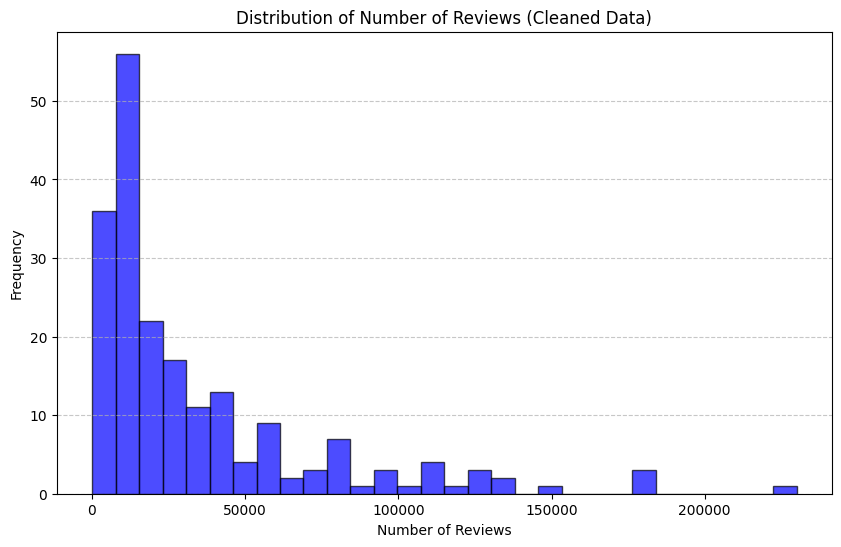

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/df_cleaned_data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Preprocess the data
# Extract 'Year Published' from 'Date Published'
df['Year Published'] = pd.to_datetime(df['Date Published'], errors='coerce').dt.year

plt.figure(figsize=(14, 8))
cleaned_df.boxplot(column='Avg Ratings', by='Genre', grid=False, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.title('Average Ratings by Genre (Cleaned Data)')
plt.suptitle('')  # Removes the default Pandas title
plt.xlabel('Average Ratings')
plt.ylabel('Genre')
plt.show()



# Visualization 3: Number of Books Published Per Year
year_counts = df['Year Published'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
year_counts.plot(kind='line', marker='o', color='green')
plt.title('Number of Books Published Per Year')
plt.xlabel('Year Published')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()

# Visualization: Histogram of Number of Reviews in the Cleaned Data

plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['Number of Reviews'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Reviews (Cleaned Data)')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

